Import essential Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Specify the online source URL of the UCI Adult dataset (also known as Census Income dataset).

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

Assign column names to match the structure of the dataset for better readability and referencing.

In [3]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

In [4]:
df = pd.read_csv(url, names=columns, na_values='?')

EDA

In [5]:
df.shape

(32561, 15)

In [6]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Encoding Target Variable

In [7]:
df['income'] = df['income'].apply(lambda x : 1 if '>50K' in x else 0)

In [9]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
df.income.dtype

dtype('int64')

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

Select Numerical Columns

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop('income', axis=1).columns.tolist()

In [18]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Select Categorical Columns

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [20]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

Data Spliting

In [ ]:
X = df.drop('income', axis=1)
y = df.income

In [21]:
from sklearn.model_selection import train_test_split

Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Builds a pipeline using ColumnTransformer that applies:

- OneHotEncoding to categorical features

- StandardScaler to numeric features

In [25]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('col', OneHotEncoder(), cat_cols)
])

Compile model with Preprocessing pipeline and RandomForestClassifier

In [28]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

Train model

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('col', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Model Evaluation

In [30]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
report = classification_report(y_test, y_pred)

In [35]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.72      0.62      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [36]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
import seaborn as sns

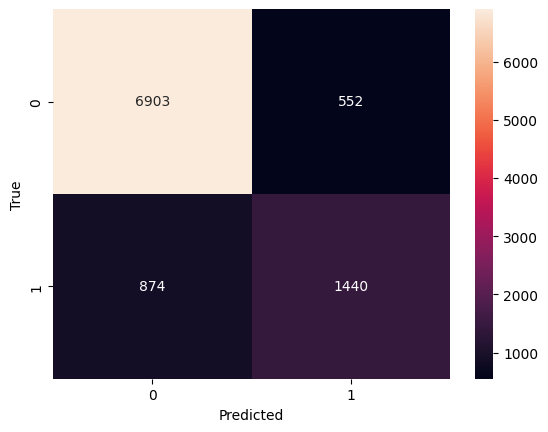

In [45]:
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot()
plt.show()

Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
}

In [48]:
grid = GridSearchCV(model, param_grid, cv=3, scoring='f1')

In [49]:
grid.fit(X_train, y_train)

C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('col',
                                                                         OneHotEncoder(),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100]},
             scoring='f1')

In [50]:
y_pred2 = grid.predict(X_test)

In [51]:
report2 = classification_report(y_test, y_pred2)

In [52]:
print(report2)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.73      0.62      0.67      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [53]:
cm = confusion_matrix(y_test, y_pred2)

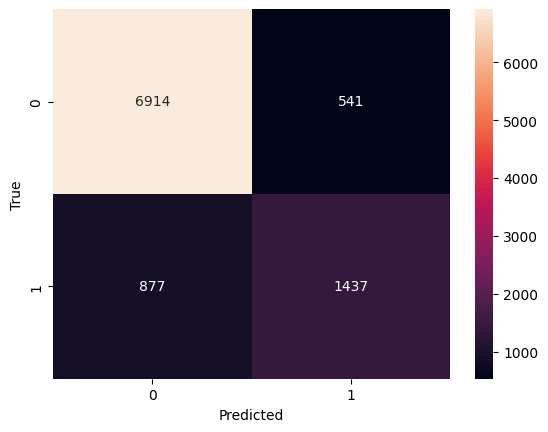

In [55]:
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.plot()
plt.show()

Using SMOTE for Handling class imbalance in order to imporove model Performance in terms of sensitivity.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
from imblearn.pipeline import Pipeline as ImbPipeline
pipeline = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier())
])

In [68]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('col', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier())])

In [69]:
y_pred3 = grid.predict(X_test)

In [70]:
report3 = classification_report(y_test, y_pred3)

In [71]:
print(report3)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7417
           1       0.93      0.89      0.91      2352

    accuracy                           0.96      9769
   macro avg       0.95      0.94      0.94      9769
weighted avg       0.96      0.96      0.96      9769



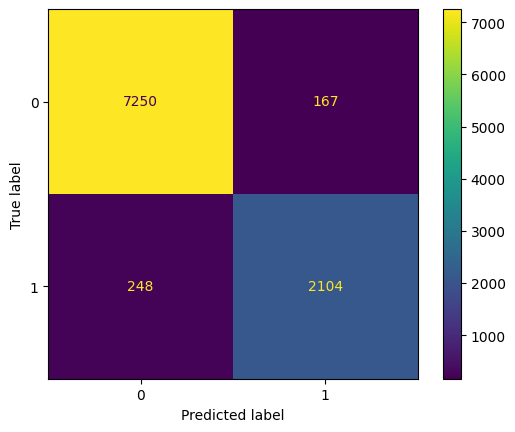

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)